In [63]:
# %load functions.py
import csv
import json
import matplotlib.pyplot as plt

top_500_albums_file = 'data.csv' #rolling stone's top 500 albums
top_500_songs_file = 'top-500-songs.txt' #top 500 songs .txt file
track_data_json_file = 'track_data.json' #json file with track data

"""Open & Read Various Files"""
with open(top_500_albums_file) as f:
    reader = csv.DictReader(f)
    temp_all_albums = [dict(row) for row in reader]

with open(top_500_songs_file, 'r') as f:
    lines = f.readlines()

with open(track_data_json_file, 'r') as f:
    track_data = json.load(f)

all_albums = [] #global variable holding LIST of all albums as dictionaries

for album in temp_all_albums:
    """Convert Strings to Integers for Rank & Years"""
    album['number'] = int(album['number'])
    album['year'] = int(album['year'])
    all_albums.append(album)

In [64]:
######

def find_album(album_name, _list):
    for album in _list:
        if album['album'] == album_name:
            return f"Dictionary for {album_name}: {album}\n"
    else:
        return None

print(find_album('The Sun Sessions', all_albums))

######

def find_rank(album_rank, _list):
    for album in _list:
        if album['number'] == album_rank:
            return f"The number {album_rank}-ranked album is {album['album']}\n"
    else:
        return None

print(find_rank(100, all_albums))

#####

def find_by_year(year, _list):
    solution = []
    for album in _list:
        if album['year'] == year:
            solution.append(album['album'])
    return f"Albums released in {year}: {solution}\n"

print(find_by_year(1976, all_albums))

######

def find_by_years(start_year, end_year, _list):
    solution = []
    for album in _list:
        if album['year'] >= start_year and album['year'] <= end_year:
            solution.append(album['album'])
    return f"Albums relesed between the beginning of {start_year} and end of {end_year}: {solution}\n"

print(find_by_years(1976, 1977, all_albums))

######

def find_by_ranks(start_rank, end_rank, _list):
    solution = []
    for album in _list:
        if album['number'] > start_rank and album['number'] < end_rank:
            solution.append(album['album'])
    return f"Albums ranked between {start_rank} and {end_rank}: {solution}\n"

print(find_by_ranks(0, 11, all_albums))

######

def all_titles(_list):
    return [album['album'] for album in _list]

print("All Titles: ", all_titles(all_albums), "\n")

######

def all_artists(_list):
    return [album['artist'] for album in _list]

print("All Artists: ", all_artists(all_albums), "\n")

######

def most_appearances(key, _list):
    count = {}
    for album in _list:
        count[album[key]] = count.get(album[key], 0) + 1
    max_apperances = sorted(count.items(), key=lambda x: x[1], reverse=True)
    max_num = max_apperances[0][1]
    return [key for (key, value) in count.items() if value == max_num]
    
print("Most Appearances: ", most_appearances('artist', all_albums), "\n")

######

def most_popular(_list):
    all_words = []
    for album in all_titles(_list):
        all_words += album.split()

    word_count = {}
    for word in all_words:
        word_count[word] = word_count.get(word, 0) + 1

    max_word_count = max(zip(word_count.values(), word_count.keys()))
    return f"\"{max_word_count[1]}\" is the most popular word, appearing {max_word_count[0]} times in all of the album titles.\n"

print(most_popular(all_albums))

#####

def albums_by_year(_list):
    by_year = {}
    for album in _list:
        by_year[album['year']] = by_year.get(album['year'], 0) + 1
    return sorted(by_year.items(), key=lambda x: x[0])

print("Number of Albums by Year: ", albums_by_year(all_albums), "\n")

######

def genre_counts(_list):
    by_genre = {}
    for album in _list:
        by_genre[album['genre']] = by_genre.get(album['genre'], 0) + 1
    return sorted(by_genre.items(), key=lambda x: x[1], reverse=True)

print("Number of Albums by Genre: ", genre_counts(all_albums), "\n")

######

Dictionary for The Sun Sessions: {'number': 11, 'year': 1976, 'album': 'The Sun Sessions', 'artist': 'Elvis Presley', 'genre': 'Rock', 'subgenre': 'Rock & Roll'}

The number 100-ranked album is Odessey and Oracle

Albums released in 1976: ['The Sun Sessions', 'Ramones', 'Hotel California', 'Songs in the Key of Life', 'Chronicle: The 20 Greatest Hits', 'Desire', 'Rocks', 'Station to Station', 'The Modern Lovers', 'The Pretender', 'Fly Like an Eagle', 'Destroyer']

Albums relesed between the beginning of 1976 and end of 1977: ['The Sun Sessions', 'Rumours', 'Ramones', 'Hotel California', "Never Mind the Bollocks Here's the Sex Pistols", 'Songs in the Key of Life', 'Chronicle: The 20 Greatest Hits', 'The Stranger', 'The Clash', 'Rocket to Russia', 'Marquee Moon', 'Saturday Night Fever: The Original Movie Soundtrack Deluxe Edition', 'Aja', 'My Aim Is True', 'Exodus', 'Desire', 'Rocks', 'Low', 'Talking Heads: 77', 'Station to Station', 'Slowhand', 'Bat Out of Hell', 'The Modern Lovers', 'Th

In [65]:
"""Functions to Create "all_songs" Dictionary from .txt file"""
def string_to_list(string):
    all_songs = []
    for line in string:
        all_songs.append(((line.rstrip()).split('\t')))
    return all_songs

list_of_songs = string_to_list(lines)

def make_songs_dict(_list):
    songs_dict = [{'RANK': Rank, 'NAME': Name, 'ARTIST': Artist, 'YEAR': Year} for (Rank, Name, Artist, Year) in _list]
    return songs_dict

all_songs = make_songs_dict(list_of_songs) #KEYS = 'RANK', NAME', 'ARTIST', 'YEAR'

######

def album_with_most_top_songs(list_songs, list_track_data):
    top_albums = {}
    for album in list_track_data:
        for song in list_songs:
            if album['artist'] == song['ARTIST'] and song['NAME'] in album['tracks']:
                top_albums[album['album']] = top_albums.get(album['album'], 0) + 1
    top_album = max(zip(top_albums.values(), top_albums.keys()))
    top_artist = [album['artist'] for album in all_albums if top_album[1] == album['album']][0]
    return f"The top album is {top_album[1]}, by {top_artist}.\n"

def albums_with_top_songs(list_songs, list_track_data):
    albums = []
    for album in list_track_data:
        for song in list_songs:
            if album['artist'] == song['ARTIST'] and song['NAME'] in album['tracks'] and album['album'] not in albums:
                albums.append(album['album'])
    return albums

def songs_that_are_on_top_albums(list_songs, list_track_data):
    top_albums = albums_with_top_songs(list_songs, list_track_data)
    return [album['tracks'] for album in list_track_data if album['album'] in top_albums]

def top_overall_artist():
    all_artists_list = all_artists(all_albums) + [album['ARTIST'] for album in all_songs]
    counted = {}
    for artist in all_artists_list:
        counted[artist] = len([a for a in all_artists_list if a == artist])
    max_count = max(zip(counted.values(), counted.keys()))
    return f"The highest scoring artist is {max_count[1]} with a score of {max_count[0]}.\n"

def top_10_albums_by_song(list_songs, list_track_data):
    top_albums = {}
    for album in list_track_data:
        for song in list_songs:
            if album['artist'] == song['ARTIST'] and song['NAME'] in album['tracks']:
                top_albums[album['album']] = top_albums.get(album['album'], 0) + 1
    x = sorted(zip(top_albums.values(), top_albums.keys()), reverse=True)
    return x[:10]
   
print("Albums with top 500 songs: ", albums_with_top_songs(all_songs, track_data), "\n")
print(album_with_most_top_songs(all_songs, track_data))
print(top_overall_artist())
print(top_10_albums_by_song(all_songs, track_data))

Albums with top 500 songs:  ['Highway 61 Revisited', "What's Going On", 'Blonde on Blonde', 'The Sun Sessions', 'The Velvet Underground & Nico', 'Are You Experienced', 'Born to Run', 'Thriller', 'Innervisions', 'The Joshua Tree', 'Led Zeppelin', 'Bringing It All Back Home', 'Let It Bleed', 'Tapestry', 'The Doors', "Here's Little Richard", 'Meet The Beatles!', 'Electric Ladyland', 'Elvis Presley', 'Beggars Banquet', 'Appetite for Destruction', 'Achtung Baby', 'Sticky Fingers', 'Moondance', '[Led Zeppelin IV]', 'Graceland', 'Physical Graffiti', 'Star Time', 'Purple Rain', 'Led Zeppelin II', 'I Never Loved a Man the Way I Love You', 'Lady Soul', 'Born in the U.S.A.', 'The Wall', 'Talking Book', 'Sweet Baby James', 'Portrait of a Legend 1951-1964', 'The Bends', 'Court and Spark', 'The Who Sell Out', 'Pearl', 'Marquee Moon', 'OK Computer', "Let's Get It On", 'My Aim Is True', 'Every Picture Tells a Story', 'Red Headed Stranger', 'The Stooges', 'From Elvis in Memphis', 'Murmur', 'Highway to 

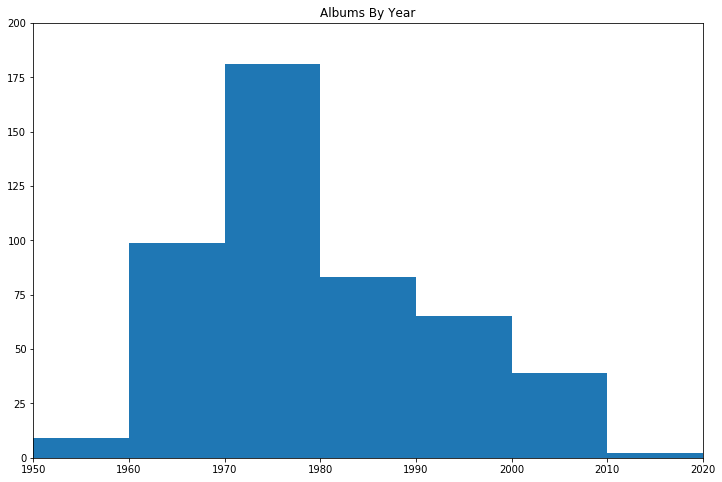

In [66]:
x = [album['year'] for album in all_albums]
bins = list(range(1950, 2030, 10))
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.hist(x, bins)
ax.set_xlim(1950, 2020), ax.set_ylim(0, 200)
ax.set_title('Albums By Year')
plt.show()

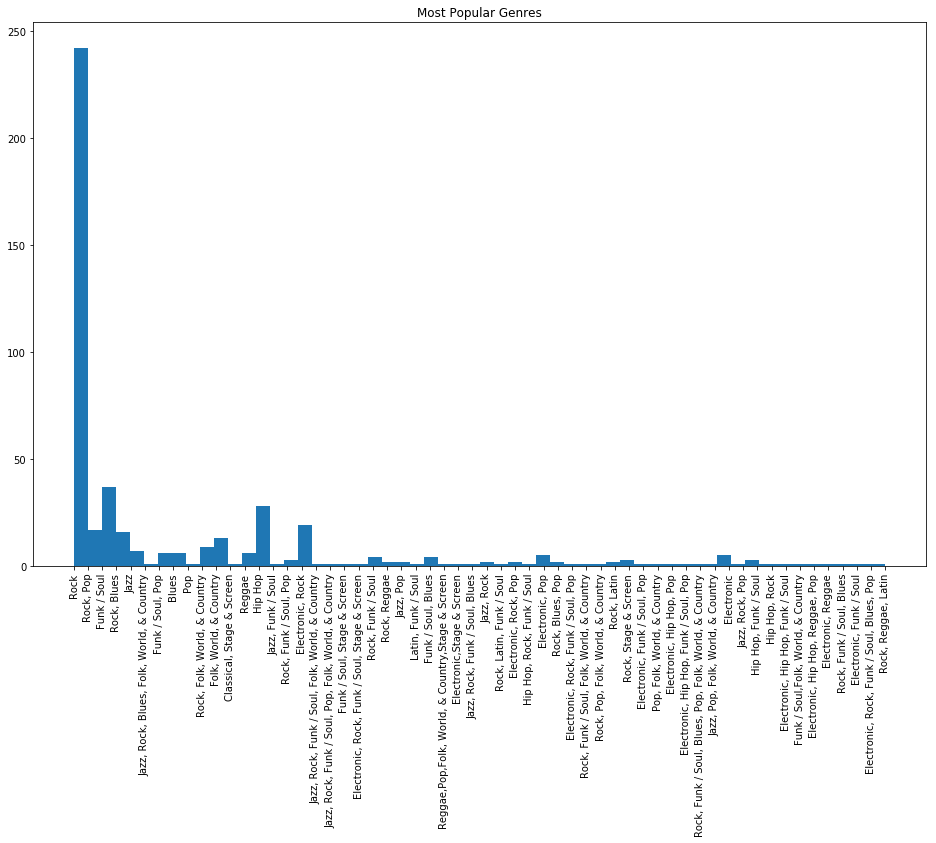

In [67]:
y = [album['genre'] for album in all_albums]
bins = len(set(y))
plt.figure(figsize=(16, 10))
plt.hist(y, bins)
plt.title('Most Popular Genres')
plt.xticks(rotation='vertical')
plt.show()

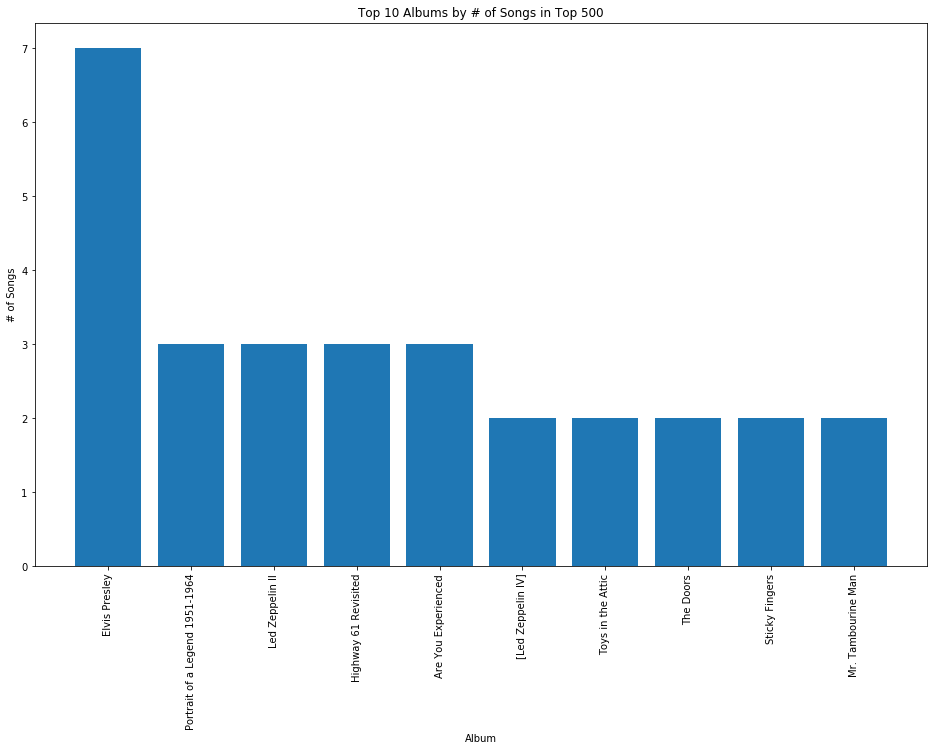

In [88]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
top_10_albums = top_10_albums_by_song(all_songs, track_data)
x = [i[1] for i in top_10_albums]
y = [i[0] for i in top_10_albums]

plt.bar(range(len(x)), y)

ax.set_xticks(range(0,len(x)))
ax.set_xticklabels(x, rotation=90)

plt.title('Top 10 Albums by # of Songs in Top 500')
plt.xlabel('Album')
plt.ylabel('# of Songs')
plt.show()
